<a href="https://colab.research.google.com/github/muaazahmad00/AIC-Q2-NumPy/blob/main/Train_Image_Classification_Model_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Local Setup

In [5]:
#LOCAL SETUP

#!pip install tensorflow
# for gpu
#!pip install tensorflow-gpu
#!pip install pillow matplotlib

##Downloading Dataset


In [6]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xvf flower_photos.tgz

--2021-06-27 09:57:36--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.217.164.144, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   265MB/s    in 0.8s    

2021-06-27 09:57:37 (265 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_p

##Mounting Google Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load and Preprocess Data

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
batch_size = 32 # input batch size
img_size = (180, 180) # height x width

###Read Training Dataset

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "flower_photos", # directory path
    validation_split=0.2, # we use 80% data for training
    subset="training",
    seed=123,
    image_size=(img_size[0], img_size[1]), # image height and width
    batch_size=batch_size # batch size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


###Validation Data

In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "flower_photos",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_size[0], img_size[1]),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


###Visualizing Dataset

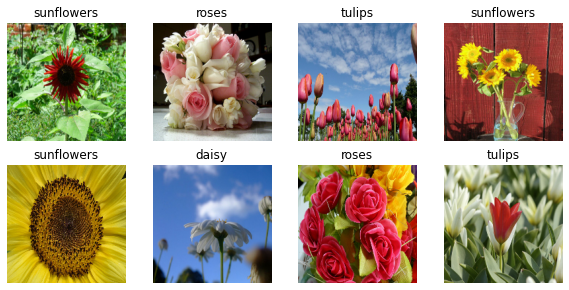

In [31]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

##Build Model

In [13]:
# keras preprocessing normalization
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

# Normalize dataset
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

In [14]:
#Deep learning Model for Classification

In [15]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_size[0], img_size[1], 3)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(256, activation="relu"))
model.add(Dense(3))

In [16]:
#As we are training a multiclass classifier,
# so we will use loss function as Sparse Categorical Crossentropy
# and for optimizer we are using adam. 

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

##Train Model

In [26]:
epochs=30
history = model.fit(
    train_ds, # training dataset
    validation_data=val_ds, #testing dataset
    epochs=epochs #no of epochs
)

Epoch 1/30
92/92 [==============================] - 8s 80ms/step - loss: nan - accuracy: 0.1717 - val_loss: nan - val_accuracy: 0.1757
Epoch 2/30
92/92 [==============================] - 7s 78ms/step - loss: nan - accuracy: 0.1717 - val_loss: nan - val_accuracy: 0.1757
Epoch 3/30
92/92 [==============================] - 8s 81ms/step - loss: nan - accuracy: 0.1717 - val_loss: nan - val_accuracy: 0.1757
Epoch 4/30
92/92 [==============================] - 8s 81ms/step - loss: nan - accuracy: 0.1717 - val_loss: nan - val_accuracy: 0.1757
Epoch 5/30
92/92 [==============================] - 7s 78ms/step - loss: nan - accuracy: 0.1717 - val_loss: nan - val_accuracy: 0.1757
Epoch 6/30
92/92 [==============================] - 8s 81ms/step - loss: nan - accuracy: 0.1717 - val_loss: nan - val_accuracy: 0.1757
Epoch 7/30
92/92 [==============================] - 8s 81ms/step - loss: nan - accuracy: 0.1717 - val_loss: nan - val_accuracy: 0.1757
Epoch 8/30
92/92 [==============================] - 8s 

##Show Loss and Accuracy

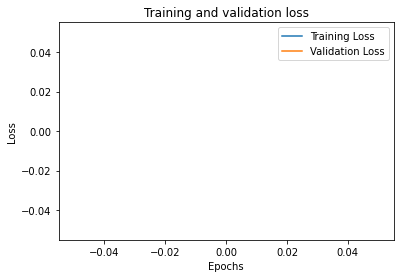

In [27]:
# show training and validation loss
plt.plot(range(epochs), history.history['loss'], label="Training Loss")
plt.plot(range(epochs), history.history['val_loss'], label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.show()

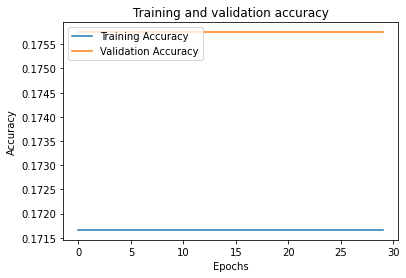

In [28]:
# show training and validation accuracy
plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.show()